<a href="https://colab.research.google.com/github/DMXMax/covid19/blob/gc_20200315/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests,json
import datetime


In [0]:
covidtrackingurl = "https://covidtracking.com/api/v1/states/daily.json"
response = requests.get(covidtrackingurl)
dfCovidtracking = pd.DataFrame(response.json())
dfCovidtracking.fillna(0, inplace=True)
dfCovidtracking.negative = dfCovidtracking.negative.astype('int64')
dfCovidtracking.positive = dfCovidtracking.positive.astype('int64')
dfCovidtracking.pending = dfCovidtracking.pending.astype('int64')
dfCovidtracking.total = dfCovidtracking.total.astype('int64')
dfCovidtracking.death = dfCovidtracking.death.astype('int64')

dfCovidtracking.date = dfCovidtracking.date.transform(lambda x: pd.to_datetime(datetime.date(x//10000, x%10000//100, x%100
                                          )))


In [0]:
dfWHO = pd.read_csv("https://raw.githubusercontent.com/DMXMax/covid19/master/who/who_data.tsv",
                     sep='\t', index_col='Date')

In [0]:
jhurl = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"+\
"csse_covid_19_data/csse_covid_19_daily_reports/05-18-2020.csv"


dfJHUData = pd.read_csv(jhurl, header=0,
                        names=['FIPS', 'city','state', 'country', 'last_update',
                               'lat', 'lon','confirmed', 'dead', 'recovered','active', 'key'])

In [0]:
dfWHO = dfWHO.rename(columns={"Confirmed": "confirmed", "Deaths": "who_deaths"})
dfWHO.index.names=['date']


In [149]:
dfCovidtracking[dfCovidtracking.state=='CA'].head(10)

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
5,2020-05-18,CA,80430,1212242,0,4391.0,0.0,1325.0,0.0,0.0,0.0,0.0,B,5/17/2020 00:00,a4c726f97ca716cb19c945927806f45e0bb3cbea,2020-05-18T20:00:00Z,3302,0.0,1292672,1292672,1292672,06,41.0,0.0,55838.0,1591.0,57429.0
61,2020-05-17,CA,78839,1156404,0,4291.0,0.0,1293.0,0.0,0.0,0.0,0.0,B,5/17/2020 00:00,efe3d2e04569547fc50e7c3d8084f6f4ea4d4cc7,2020-05-17T20:00:00Z,3261,0.0,1235243,1235243,1235243,06,57.0,0.0,54071.0,2046.0,56117.0
117,2020-05-16,CA,76793,1102333,0,4424.0,0.0,1313.0,0.0,0.0,0.0,0.0,B,5/16/2020 00:00,e335473bcecc2092fc63063fe12ed043c5f73751,2020-05-16T20:00:00Z,3204,0.0,1179126,1179126,1179126,06,96.0,0.0,43363.0,1857.0,45220.0
173,2020-05-15,CA,74936,1058970,0,4519.0,0.0,1324.0,0.0,0.0,0.0,0.0,B,5/14/2020 00:00,dd4a56509207e53adc6f228223657494252d0d39,2020-05-15T20:00:00Z,3108,0.0,1133906,1133906,1133906,06,76.0,0.0,27483.0,1772.0,29255.0
229,2020-05-14,CA,73164,1031487,0,4655.0,0.0,1324.0,0.0,0.0,0.0,0.0,B,5/14/2020 00:00,ab1526dbbdbe36c6e661db2aa371d77dd19df51d,2020-05-14T20:00:00Z,3032,0.0,1104651,1104651,1104651,06,98.0,0.0,37036.0,2023.0,39059.0
285,2020-05-13,CA,71141,994451,0,4545.0,0.0,1314.0,0.0,0.0,0.0,0.0,B,5/13/2020 00:00,8a5867cd4322367e6ab3f8a0fb2b92285aa60b64,2020-05-13T20:00:00Z,2934,0.0,1065592,1065592,1065592,06,87.0,0.0,30463.0,1759.0,32222.0
341,2020-05-12,CA,69382,963988,0,4544.0,0.0,1349.0,0.0,0.0,0.0,0.0,B,5/12/2020 00:00,1c3c812803c41f5b0c75e07b15a8a4428e7d662f,2020-05-12T20:00:00Z,2847,0.0,1033370,1033370,1033370,06,77.0,0.0,40030.0,1443.0,41473.0
397,2020-05-11,CA,67939,923958,0,4549.0,0.0,1329.0,0.0,0.0,0.0,0.0,B,5/11/2020 00:00,53613cacac307d4a734c079025735a0eec798c35,2020-05-11T20:00:00Z,2770,0.0,991897,991897,991897,06,25.0,0.0,34974.0,1259.0,36233.0
453,2020-05-10,CA,66680,888984,0,4555.0,0.0,1328.0,0.0,0.0,0.0,0.0,B,5/10/2020 00:00,b618e4b193ed0312e703672e19ebad8c2eb045b9,2020-05-10T20:00:00Z,2745,0.0,955664,955664,955664,06,67.0,0.0,40975.0,2119.0,43094.0
509,2020-05-09,CA,64561,848009,0,4538.0,0.0,1349.0,0.0,0.0,0.0,0.0,B,5/9/2020 14:00,47564b4be2325468b20b81c3212689a291e88901,2020-05-09T20:00:00Z,2678,0.0,912570,912570,912570,06,93.0,0.0,35249.0,2049.0,37298.0


In [150]:
dfctd_state_curr = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max()] \
  .rename(columns={'positive':'total_positive'}) \
  .set_index('state') 

print(f"Total positive cases = {dfctd_state_curr.total_positive.sum()}")
print(f"Total deaths = {dfctd_state_curr.death.sum()}")
  
dfctd_state_curr.sort_values(by='total_positive', ascending=False).head(5)

Total positive cases = 1499722
Total deaths = 84640


,date,total_positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
state,,,,,,,,,,,,,,,,,,,,,,,,,,
NY,2020-05-18,351371,1088186,0,5840.0,75870.0,1908.0,0.0,1538.0,0.0,61681.0,A,5/18/2020 00:00,46fa5352dd39fe8d99308c648d0ba385f1fd5f4c,2020-05-18T20:00:00Z,22729,75870.0,1439557,1439557,1439557,36,110.0,345.0,24911.0,1250.0,26161.0
NJ,2020-05-18,148039,357530,0,3509.0,0.0,1053.0,0.0,819.0,0.0,23496.0,A+,5/18/2020 13:00,9fd971392a15734029c07e9cd8e5b37935afb141,2020-05-18T20:00:00Z,10435,0.0,505569,505569,505569,34,79.0,0.0,16299.0,1705.0,18004.0
IL,2020-05-18,96485,506756,0,4120.0,0.0,1096.0,0.0,636.0,0.0,0.0,A,5/18/2020 00:59,b8244579a51ceaf3c75df057dfe600686fa83b4a,2020-05-18T20:00:00Z,4234,0.0,603241,603241,603241,17,57.0,0.0,19003.0,2294.0,21297.0
MA,2020-05-18,86010,374816,0,2597.0,8539.0,702.0,0.0,0.0,0.0,0.0,A+,5/17/2020 10:00,7d19fbf3be434c0bc4af0894ac0300d3731e1239,2020-05-18T20:00:00Z,5797,8539.0,460826,460826,460826,25,0.0,0.0,0.0,0.0,0.0
CA,2020-05-18,80430,1212242,0,4391.0,0.0,1325.0,0.0,0.0,0.0,0.0,B,5/17/2020 00:00,a4c726f97ca716cb19c945927806f45e0bb3cbea,2020-05-18T20:00:00Z,3302,0.0,1292672,1292672,1292672,06,41.0,0.0,55838.0,1591.0,57429.0


In [0]:
curr_state = 'CA'
gbUSA = dfCovidtracking.groupby(['date'])
gbState = dfCovidtracking[dfCovidtracking.state==curr_state].groupby(['date'])

cols = ['positive', 'totalTestResults', 'death', 'positiveIncrease','deathIncrease']

dfUSAPos = gbUSA[cols].sum().reset_index().copy()
dfStatePos = gbState[cols].sum().reset_index().copy()

#This will calculate the percentage each day is of the total. In a flattening, this will be more even
# In a high growth situation, you'll higher percentages at the tail. 

dfUSAPos['pos_pct']= dfUSAPos.positive/dfctd_state_curr.total_positive.sum()
dfStatePos['pos_pct']=dfStatePos.positive/dfctd_state_curr.loc[curr_state].total_positive

In [152]:
dfUSAPos[-7:]


,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,pos_pct
111,2020-05-12,1361884,9650405,76650,21472.0,1543.0,0.908091
112,2020-05-13,1382304,9974831,78343,20420.0,1693.0,0.921707
113,2020-05-14,1407507,10341775,80084,25203.0,1741.0,0.938512
114,2020-05-15,1433696,10720185,81729,26189.0,1645.0,0.955975
115,2020-05-16,1458787,11077179,83015,25091.0,1286.0,0.972705
116,2020-05-17,1479856,11488414,83854,21069.0,839.0,0.986754
117,2020-05-18,1499722,11834508,84640,19866.0,786.0,1.000000


In [153]:
dfStatePos[-7:]

,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,pos_pct
69,2020-05-12,69382,1033370,2847,1443.0,77.0,0.862638
70,2020-05-13,71141,1065592,2934,1759.0,87.0,0.884508
71,2020-05-14,73164,1104651,3032,2023.0,98.0,0.909661
72,2020-05-15,74936,1133906,3108,1772.0,76.0,0.931692
73,2020-05-16,76793,1179126,3204,1857.0,96.0,0.954781
74,2020-05-17,78839,1235243,3261,2046.0,57.0,0.980219
75,2020-05-18,80430,1292672,3302,1591.0,41.0,1.000000


In [154]:
gbUSA.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-05-14,1407507,8934268,2673,44317.0,152396.0,10901.0,6795.0,5940.0,582.0,246414.0,80084,152396.0,10344448,10341775,10341775,1741.0,3049.0,341741.0,25203.0,366944.0
2020-05-15,1433696,9286489,2457,42854.0,153866.0,10704.0,6890.0,5746.0,589.0,250747.0,81729,153866.0,10722642,10720185,10720185,1645.0,1470.0,352221.0,26189.0,378410.0
2020-05-16,1458787,9618392,3788,42896.0,155726.0,10509.0,6945.0,5529.0,592.0,268376.0,83015,155726.0,11080967,11077179,11077179,1286.0,1860.0,331903.0,25091.0,356994.0
2020-05-17,1479856,10008558,3449,41108.0,156905.0,10164.0,7003.0,5467.0,593.0,272265.0,83854,156905.0,11491863,11488414,11488414,839.0,1179.0,390166.0,21069.0,411235.0
2020-05-18,1499722,10334786,3596,40933.0,157963.0,10015.0,7064.0,5257.0,602.0,283178.0,84640,157963.0,11838104,11834508,11834508,786.0,1058.0,326228.0,19866.0,346094.0


In [155]:
gbState.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-05-14,73164,1031487,0,4655.0,0.0,1324.0,0.0,0.0,0.0,0.0,3032,0.0,1104651,1104651,1104651,98.0,0.0,37036.0,2023.0,39059.0
2020-05-15,74936,1058970,0,4519.0,0.0,1324.0,0.0,0.0,0.0,0.0,3108,0.0,1133906,1133906,1133906,76.0,0.0,27483.0,1772.0,29255.0
2020-05-16,76793,1102333,0,4424.0,0.0,1313.0,0.0,0.0,0.0,0.0,3204,0.0,1179126,1179126,1179126,96.0,0.0,43363.0,1857.0,45220.0
2020-05-17,78839,1156404,0,4291.0,0.0,1293.0,0.0,0.0,0.0,0.0,3261,0.0,1235243,1235243,1235243,57.0,0.0,54071.0,2046.0,56117.0
2020-05-18,80430,1212242,0,4391.0,0.0,1325.0,0.0,0.0,0.0,0.0,3302,0.0,1292672,1292672,1292672,41.0,0.0,55838.0,1591.0,57429.0


In [156]:
rn = gbState.sum().loc['2020-05-02']
rn.positive/rn.totalTestResults*100

7.599995923139533

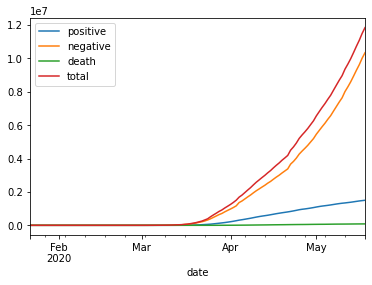

In [157]:
x=gbUSA.sum().loc[:, ['positive', 'negative','death','total']].plot.line()

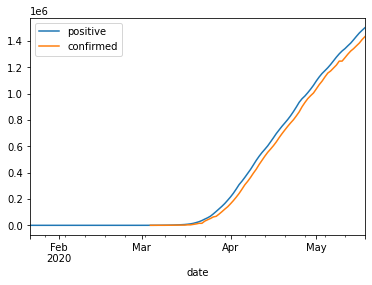

In [158]:
dfResults = gbUSA.sum().join(dfWHO, how='left', rsuffix='_who' )
dfResults.loc[:, ['positive', 'confirmed']].plot.line()

# John Hopkins Data


In [159]:
dfJHUData[dfJHUData.country=='US'][['confirmed', 'dead']].sum()

confirmed    1508308
dead           90347
dtype: int64

In [160]:
dfJHUData[(dfJHUData.country=='US')&(dfJHUData.state=='California')][['confirmed', 'dead']].sum()

confirmed    81457
dead          3279
dtype: int64

In [0]:
dfJHUUS = dfJHUData[dfJHUData.country=='US']
gbJHUByState= dfJHUUS.groupby(by='state')
gbJHUByCountry = dfJHUData.groupby(by='country')

In [162]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(10)

country
US                1508308
Russia             290678
Brazil             255368
United Kingdom     247709
Spain              231606
Italy              225886
France             180051
Germany            176551
Turkey             150593
Iran               122492
Name: confirmed, dtype: int64

In [163]:
dfctd_state_curr.head()

,date,total_positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
state,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,2020-05-18,399,35212,0,9.0,0.0,0.0,0.0,0.0,0.0,345.0,B,5/18/2020 00:00,b3ccfa9231cf1d4225bef777e18aef9279196f72,2020-05-18T20:00:00Z,10,0.0,35611,35611,35611,02,0.0,0.0,957.0,3.0,960.0
AL,2020-05-18,12086,145037,0,0.0,1416.0,0.0,512.0,0.0,302.0,0.0,B,5/18/2020 00:00,5b2cfe9999f12edaaadf251db01027248479f4b9,2020-05-18T20:00:00Z,489,1416.0,157123,157123,157123,01,1.0,24.0,458.0,315.0,773.0
AR,2020-05-18,4813,80426,0,77.0,530.0,0.0,0.0,12.0,101.0,3645.0,A,5/18/2020 00:00,a1fc38a56f67ed2a8ff4225276f3fd91a77308f4,2020-05-18T20:00:00Z,100,530.0,85239,85239,85239,05,2.0,10.0,0.0,54.0,54.0
AS,2020-05-18,0,105,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,5/10/2020 00:00,bb4faca167517d155c2456a9c9ab3db494c094b4,2020-05-18T20:00:00Z,0,0.0,105,105,105,60,0.0,0.0,0.0,0.0,0.0
AZ,2020-05-18,14170,142303,0,820.0,1717.0,329.0,0.0,200.0,0.0,3570.0,A+,5/18/2020 00:00,02c1b4f1b08529a66b998e389dec4466b306a4e6,2020-05-18T20:00:00Z,686,1717.0,156473,156473,156473,04,6.0,18.0,4479.0,233.0,4712.0


In [0]:
dfState = dfCovidtracking[['date','state','positive', 'death']].set_index('state') \
  .join(dfctd_state_curr.total_positive)

In [0]:
dfState['pct']=dfState.positive/dfState.total_positive

In [166]:
dfState.loc['FL'].head(7)

,date,positive,death,total_positive,pct
state,,,,,
FL,2020-05-18,46442,2073,46442,1.000000
FL,2020-05-17,45588,2049,46442,0.981611
FL,2020-05-16,44811,2040,46442,0.964881
FL,2020-05-15,43210,1991,46442,0.930408
FL,2020-05-14,43210,1948,46442,0.930408
FL,2020-05-13,42402,1898,46442,0.913010
FL,2020-05-12,41923,1849,46442,0.902696


In [0]:
res = dfState.reset_index().pivot(index = 'date', columns='state', values='pct').fillna(0)

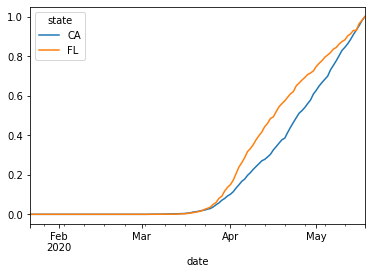

In [168]:
x = res.loc[:, ['CA','FL']].plot.line()

In [0]:
dfNYTesting = dfCovidtracking.loc[dfCovidtracking.state=='NY', ['date', 'negative']].set_index('date')

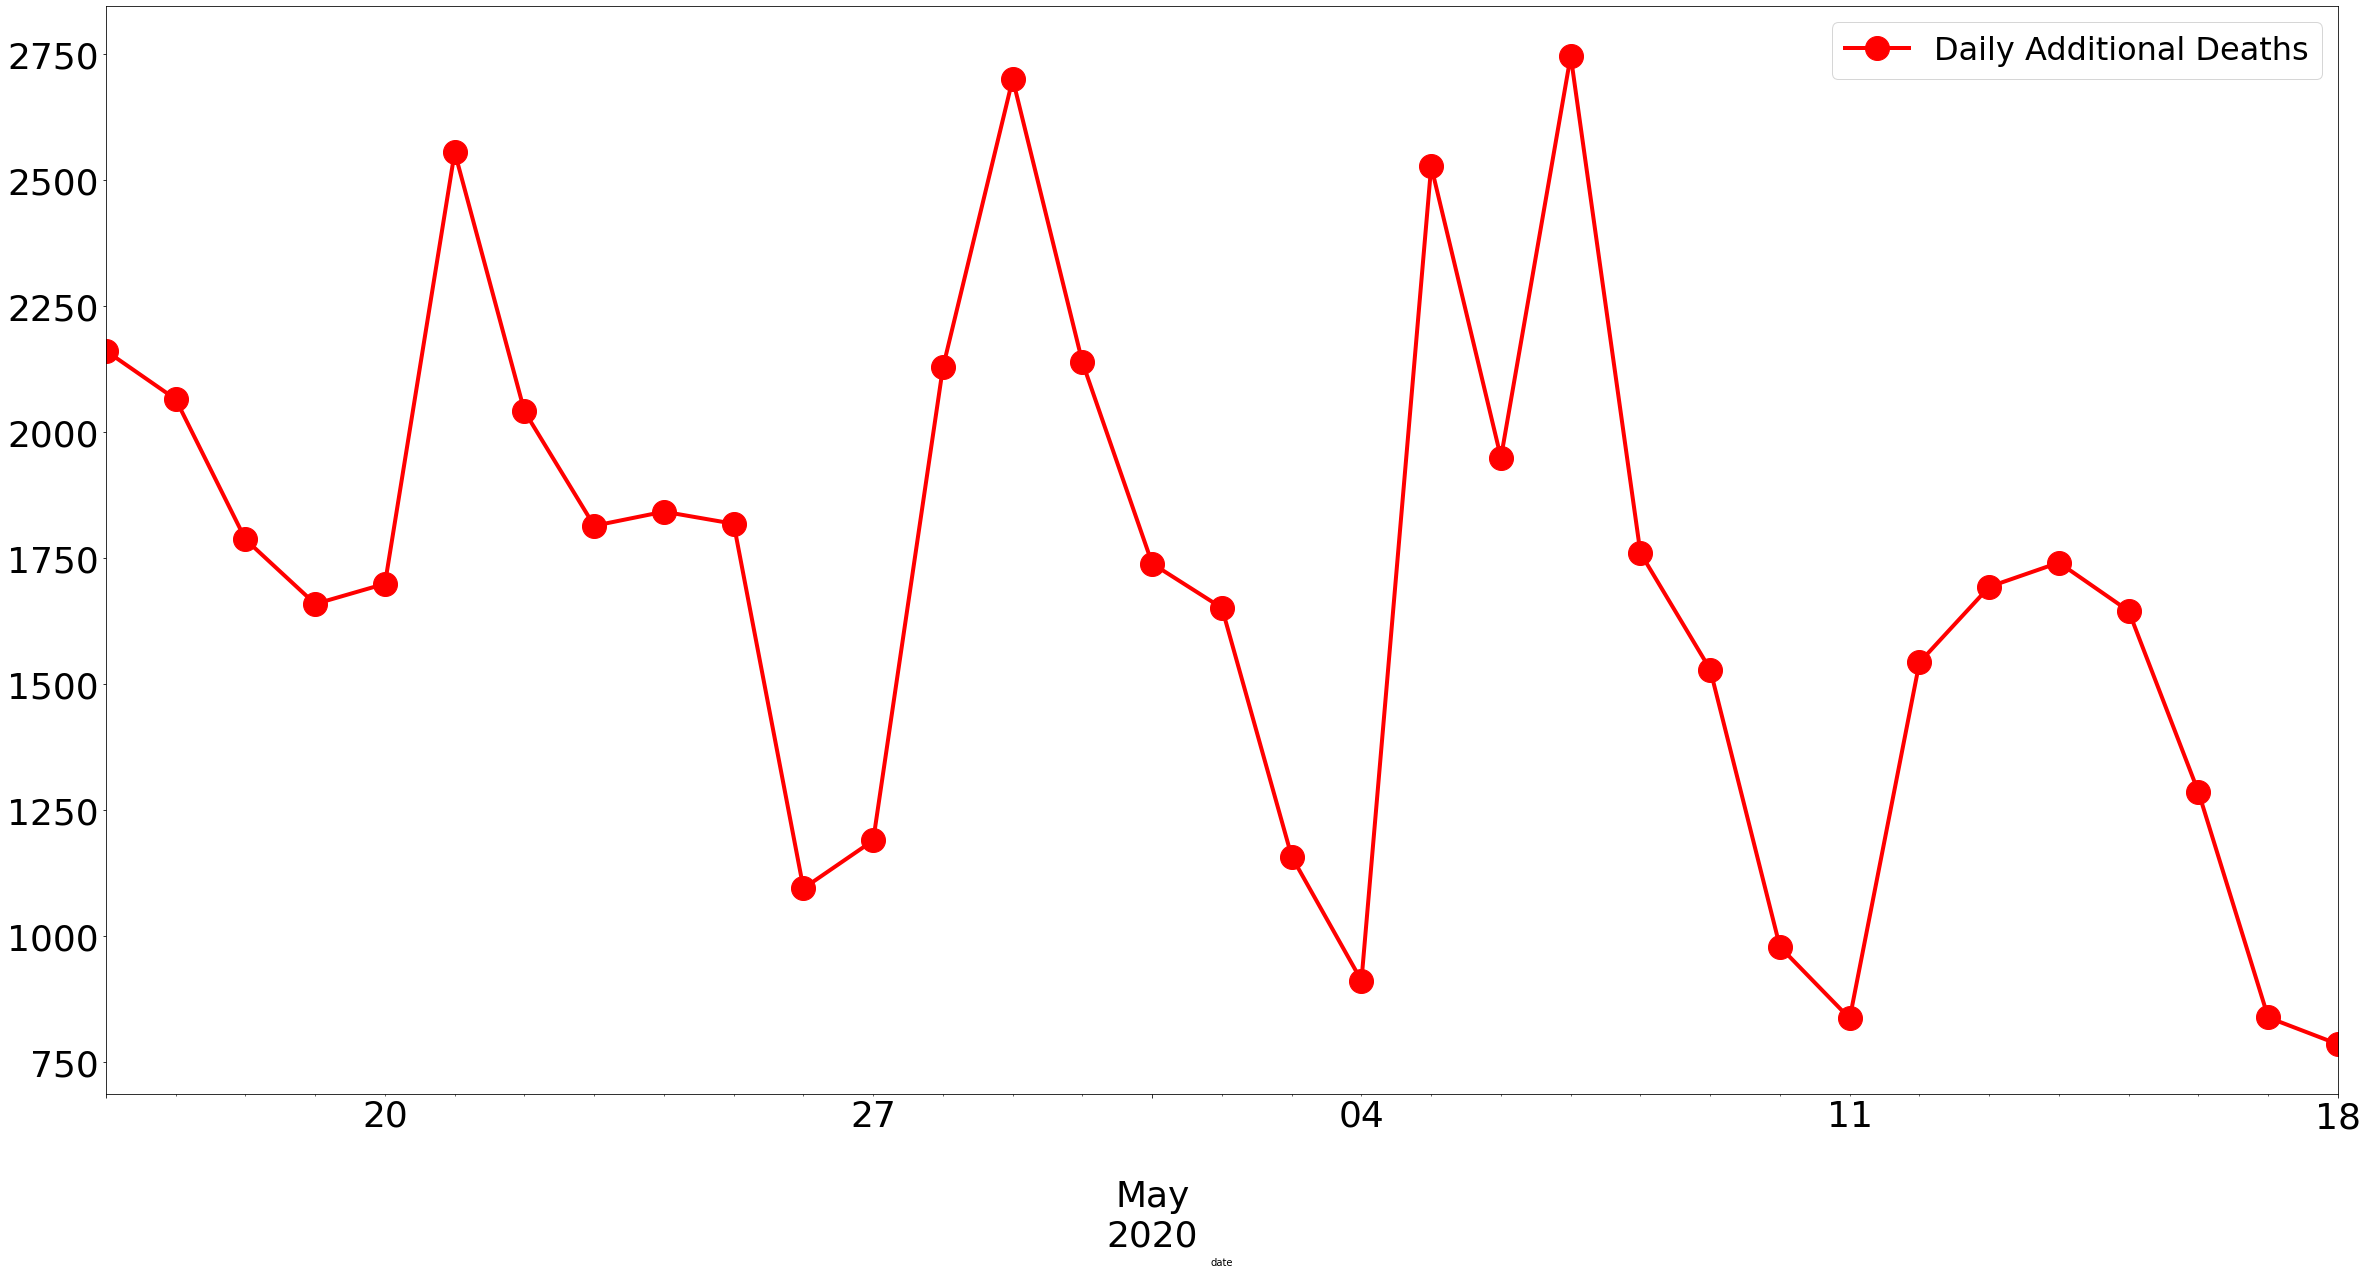

In [170]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()[-33:].deathIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Deaths'],fontsize=32)


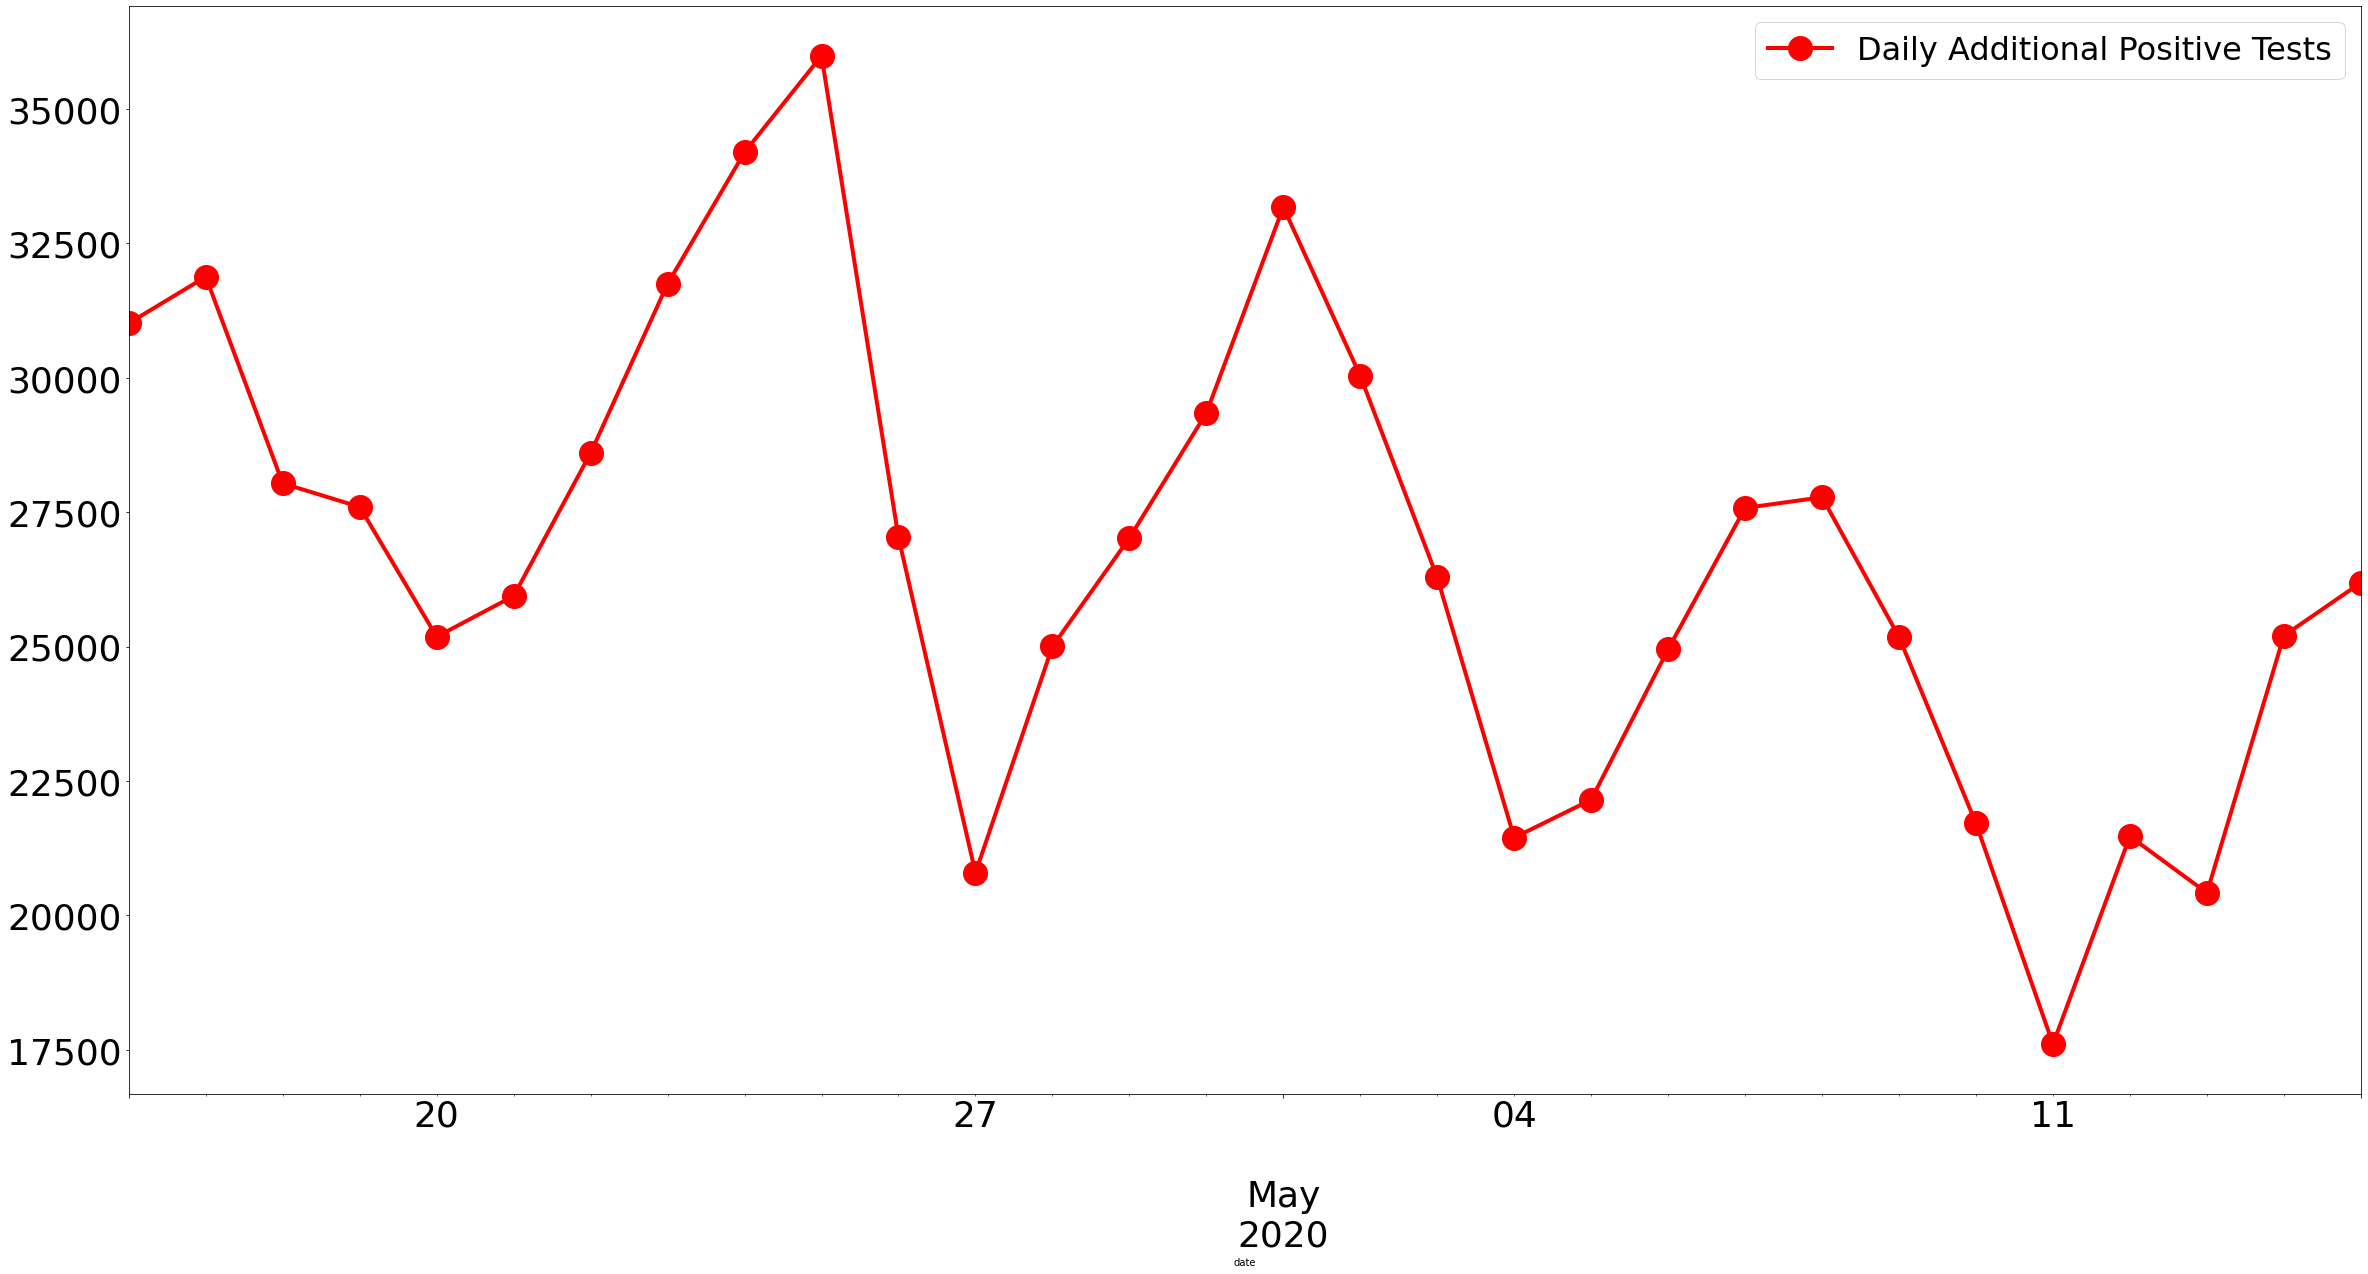

In [171]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()[-33:-3].positiveIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Positive Tests'],fontsize=32)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfByWeekYear = dfCovidtracking.set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=getWeek)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfDoW = dfCovidtracking.set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=lambda x: x.dayofweek)


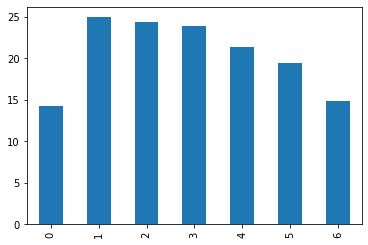

In [174]:
dfDoW.mean().deathIncrease.plot.bar()



In [175]:
dfByWeekYear.sum()[-7:]

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
202015,12523.0,22930.0,834613.0,217188.0,1051801.0
202016,14063.0,21844.0,843524.0,199740.0,1043264.0
202017,12864.0,18239.0,1309854.0,208697.0,1518551.0
202018,12704.0,24854.0,1457566.0,191663.0,1649229.0
202019,12402.0,18984.0,1745308.0,170801.0,1906796.0
202020,9584.0,12125.0,2371203.0,157049.0,2528252.0
202021,786.0,1058.0,326228.0,19866.0,346094.0


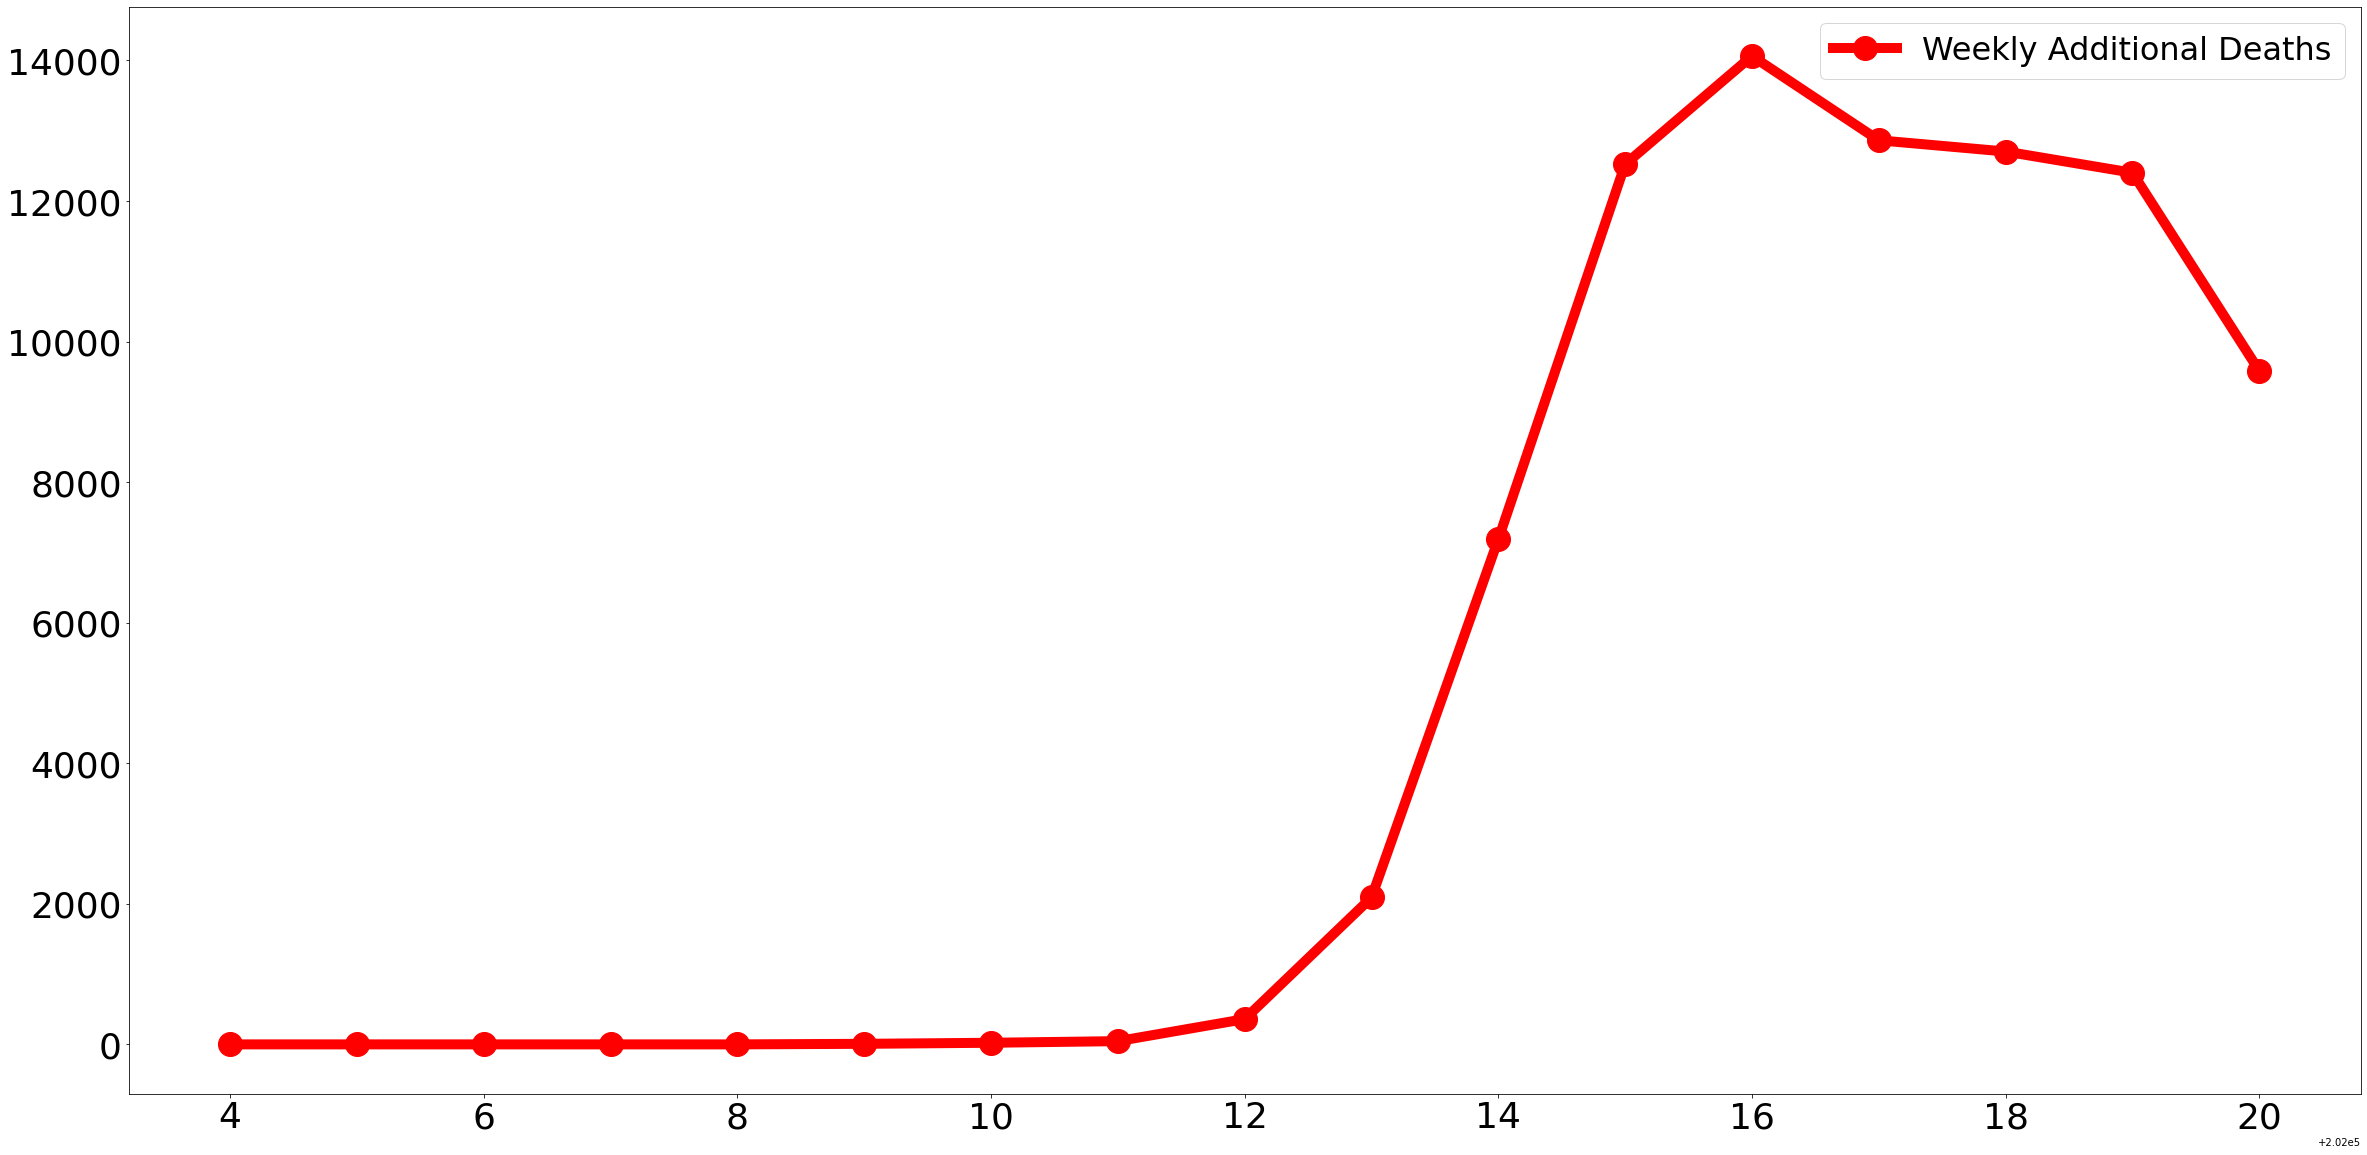

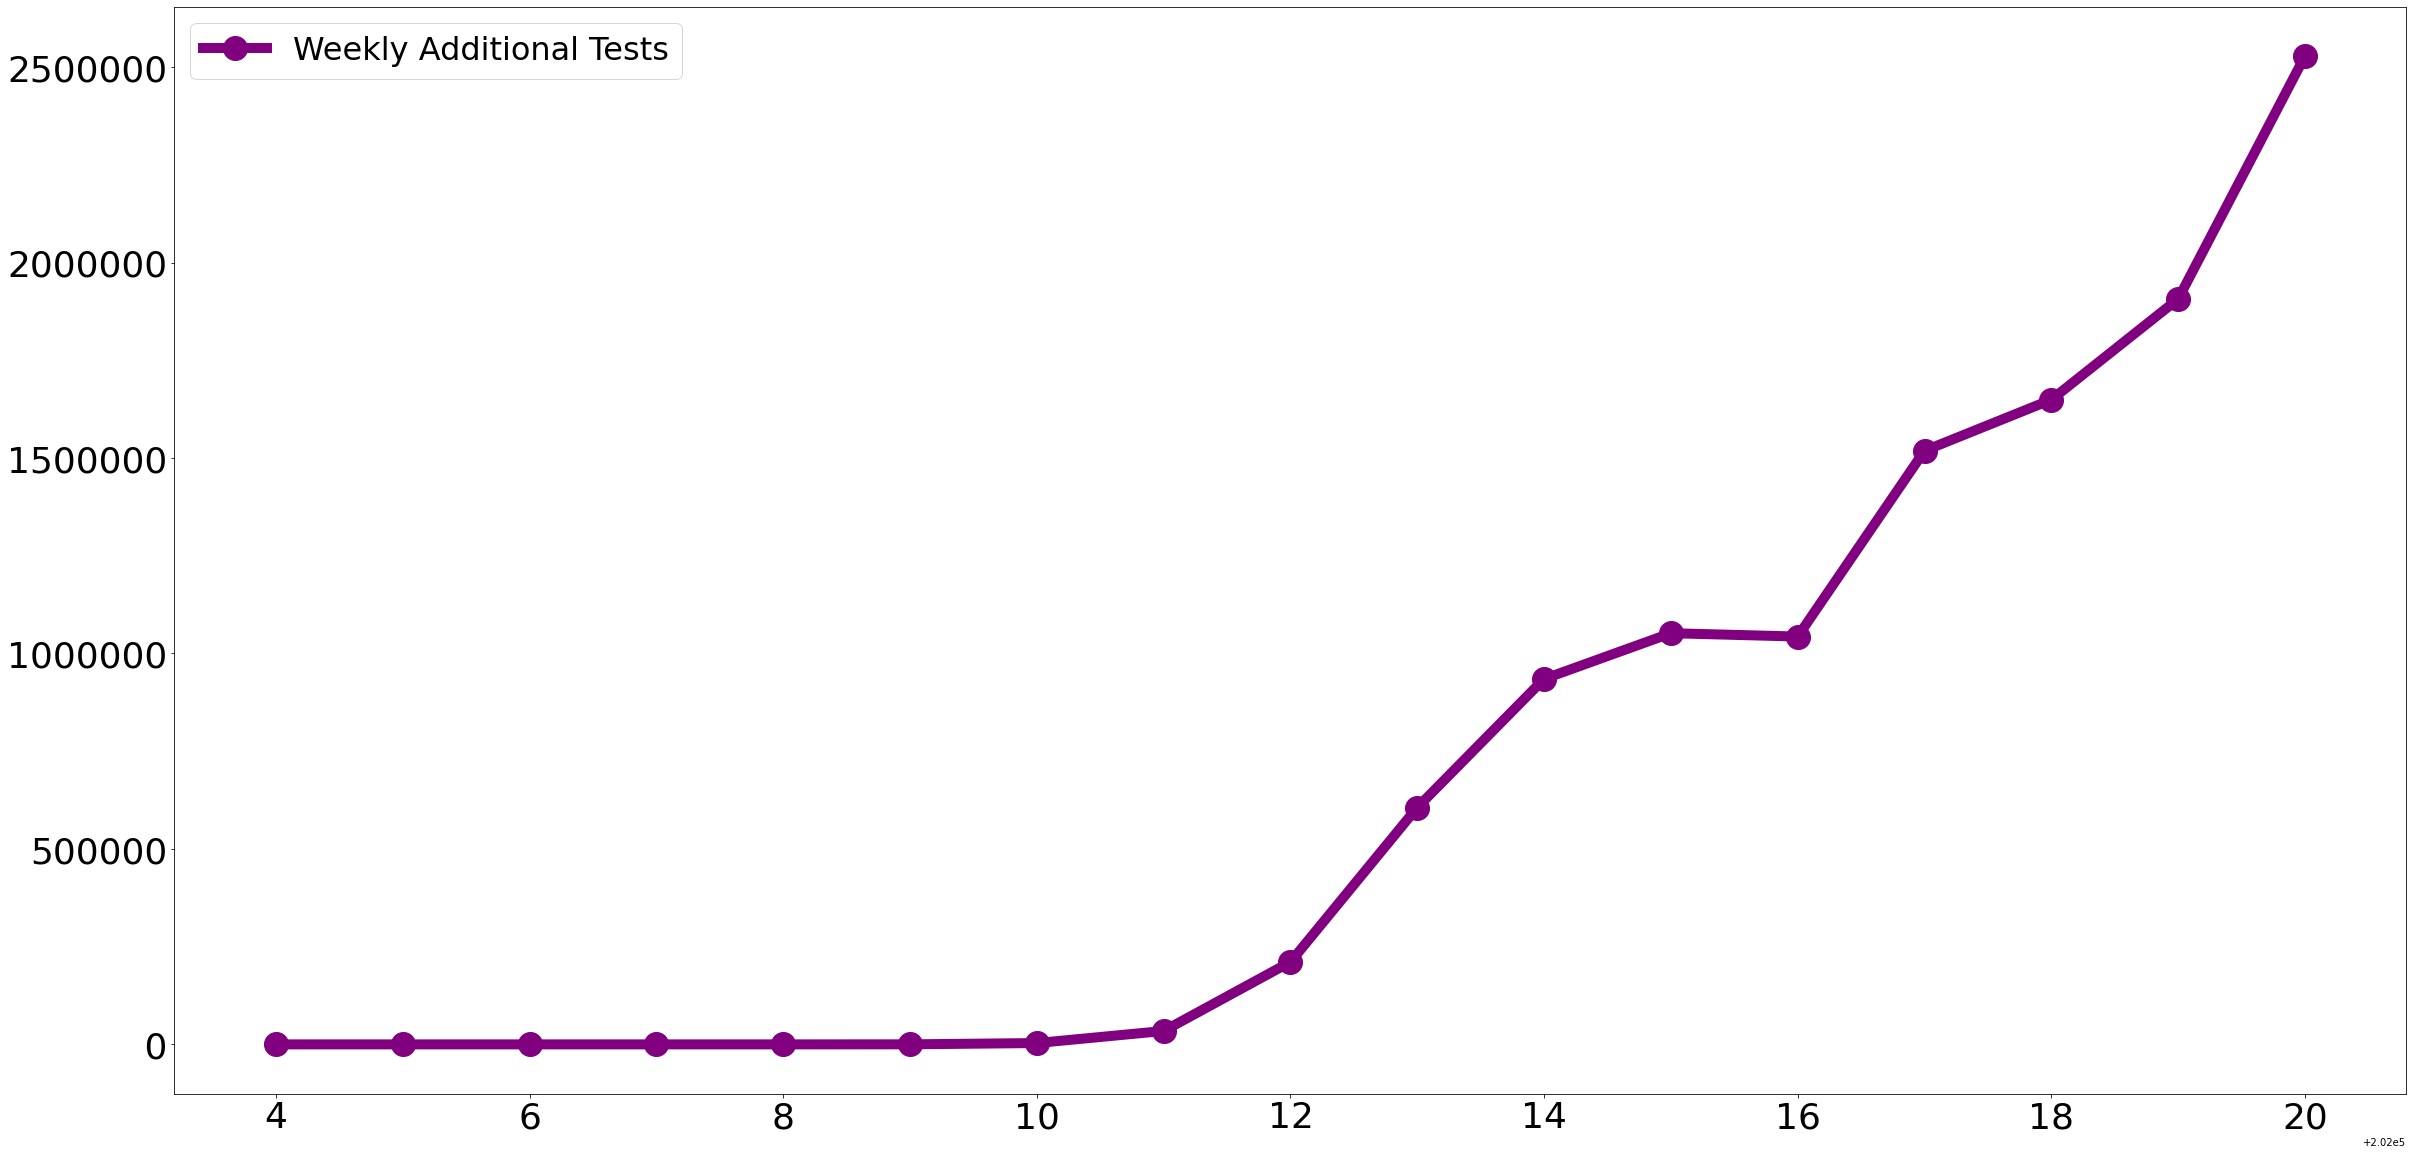

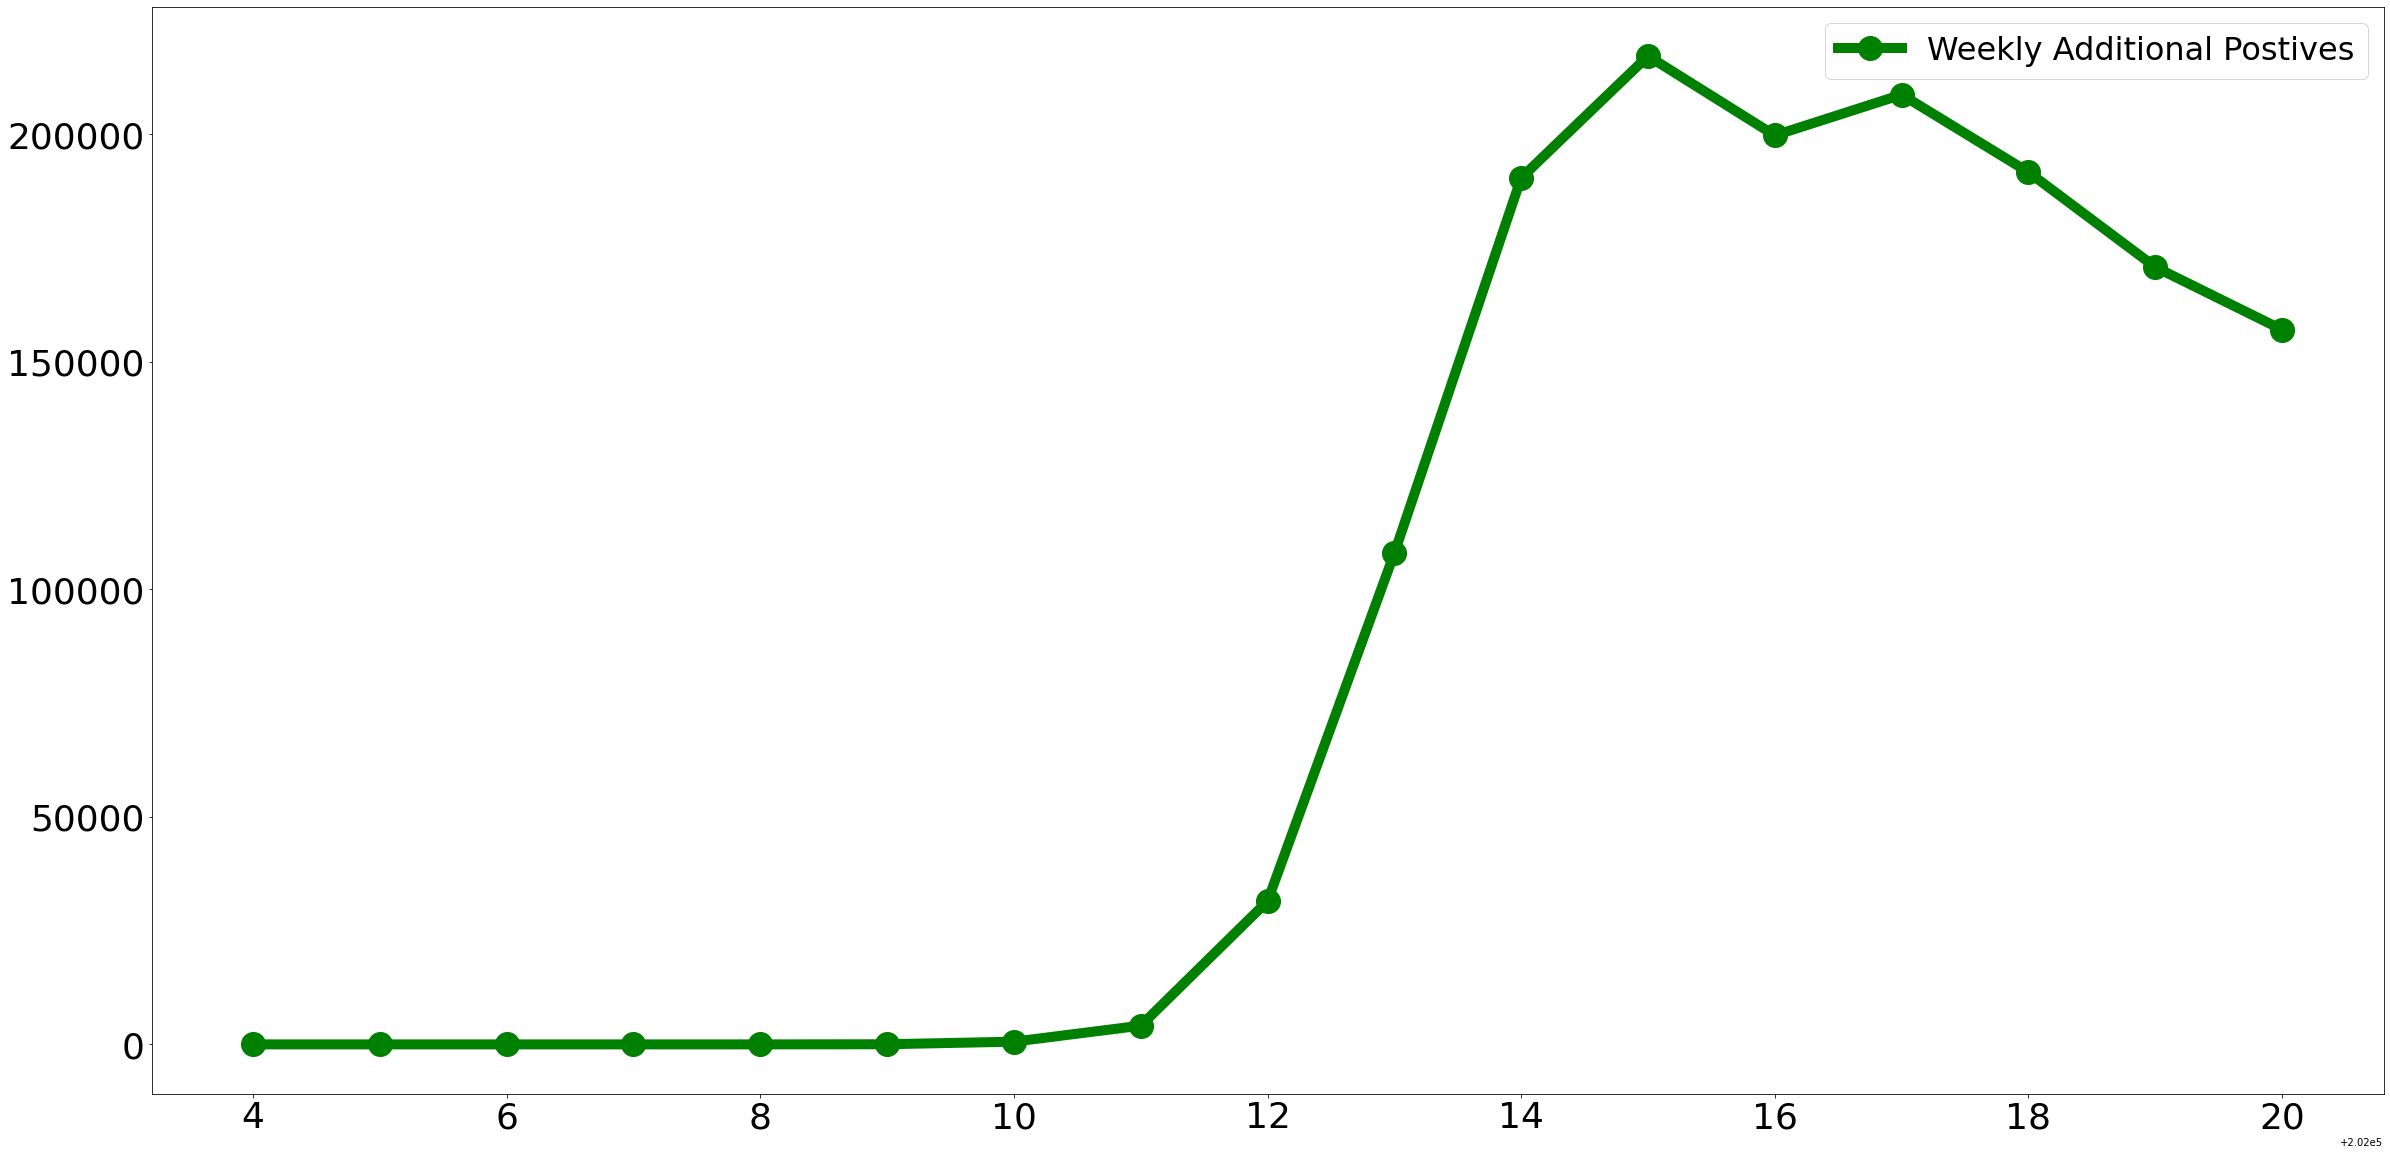

In [176]:
import matplotlib.ticker as ticker
plt1 = dfByWeekYear.sum()[:-1][['deathIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='red')
plt1.legend(['Weekly Additional Deaths'],fontsize=32)
plt2 = dfByWeekYear.sum()[:-1][['totalTestResultsIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='purple')
plt2.legend(['Weekly Additional Tests'],fontsize=32)

plt2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%6.0d'))
    
plt3 = dfByWeekYear.sum()[:-1][['positiveIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='green')
plt3.legend(['Weekly Additional Postives'],fontsize=32)

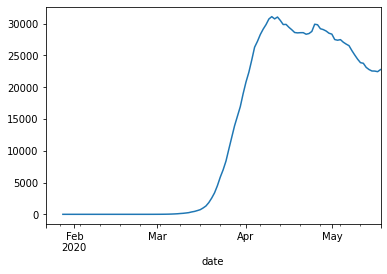

In [177]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().positiveIncrease.plot.line()

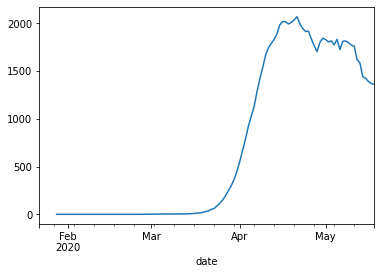

In [178]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().deathIncrease.plot.line()

In [0]:
dfCAAvg = dfCovidtracking[dfCovidtracking.state=='CA'] \
.groupby(by='date').sum().rolling(window=7).mean()

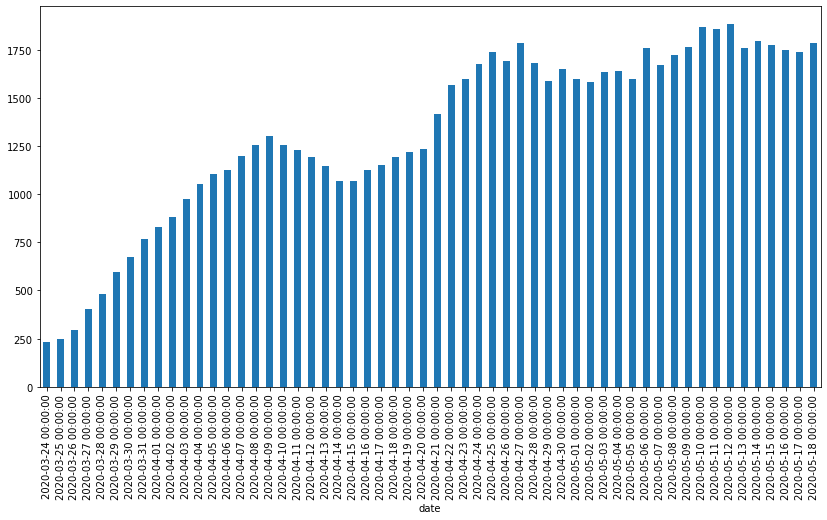

In [180]:

graph1 = dfCAAvg[20:].positiveIncrease.plot.bar(figsize=(14,7))


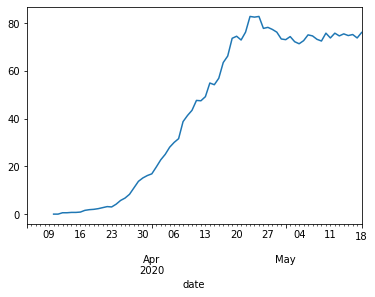

In [181]:
dfCAAvg.deathIncrease.plot.line()

In [182]:
dfDates = dfState.reset_index().copy()
dfDates[(dfDates.state.isin(['FL']))].head(10)

,state,date,positive,death,total_positive,pct
734,FL,2020-05-18,46442,2073,46442,1.000000
735,FL,2020-05-17,45588,2049,46442,0.981611
736,FL,2020-05-16,44811,2040,46442,0.964881
737,FL,2020-05-15,43210,1991,46442,0.930408
738,FL,2020-05-14,43210,1948,46442,0.930408
739,FL,2020-05-13,42402,1898,46442,0.913010
740,FL,2020-05-12,41923,1849,46442,0.902696
741,FL,2020-05-11,40982,1805,46442,0.882434
742,FL,2020-05-10,40596,1791,46442,0.874123
743,FL,2020-05-09,40001,1785,46442,0.861311


In [183]:
datecutoff = dfDates.date.max()-datetime.timedelta(days=7)
dfDates[(dfDates.date == datecutoff) & (dfDates.pct < .75)].sort_values(by='pct')


,state,date,positive,death,total_positive,pct
1843,MN,2020-05-11,11799,591,16372,0.720682


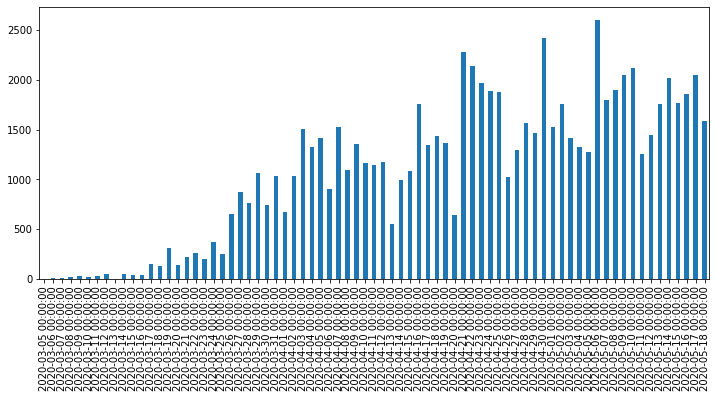

In [184]:
state = 'CA'
dfState = dfCovidtracking[dfCovidtracking.state==state].sort_values(by='date')
vals = dfState.positive.values

x=pd.Series([y-x for x,y in zip(vals,vals[1:])], \
          index = dfCovidtracking[dfCovidtracking.state==state]\
          .sort_values(by='date').date.values[1:] ) \
          .plot.bar(figsize=(12,5))



# State Population Data


In [0]:
data_url = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv"


In [0]:
dfUSPop = pd.read_csv(data_url)

In [187]:
import math
us_pop = dfUSPop.loc[0].POPESTIMATE2019 #Estimate from Wikipedia
res = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(), ['positive', 'negative', 'pending','death', 'total']].sum()
cir = res.positive/res.total
cfr = res.death/res.positive
p_aff= math.ceil(us_pop*cir)
p_dead= math.ceil(p_aff*cfr)
print(res)
print(f"Current Infection Rate {cir*100:2f}%")
print(f"Percentage of US affected: {(res.positive+res.death)/us_pop*100:2f}%")
print(f"Observed CFR: {cfr*100:2f}%")
print(f"Percentage of US tested/affected: {(res.negative+res.positive+res.death)/us_pop*100:2f}%")
print(f"Projected affected by cir = {p_aff:,d}")
print(f"Projected killed = {p_dead:,d}")


positive     1499722
negative    10334786
pending         3596
death          84640
total       11838104
dtype: int64
Current Infection Rate 12.668600%
Percentage of US affected: 0.482685%
Observed CFR: 5.643713%
Percentage of US tested/affected: 3.631235%
Projected affected by cir = 41,583,352
Projected killed = 2,346,845


In [0]:
!if [ ! -d "loc" ]; then \
git clone https://gist.github.com/rogerallen/1583593 --depth=1 --quiet loc; \
fi
import sys
sys.path.append("loc")




In [0]:
import us_state_abbrev as us_abbr


In [0]:
dfStatePop = dfUSPop[dfUSPop.STATE != 0].copy()

In [0]:
dfStatePop['ABBR']=dfStatePop.NAME.apply(lambda x: us_abbr.us_state_abbrev[x])

In [0]:
dfStatePop = dfStatePop.loc[:, ['ABBR', 'POPESTIMATE2019']]
dfStatePop.set_index('ABBR', inplace=True)

In [0]:
dfStateCovid = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max()].set_index('state')

In [0]:
dfStateJoin = dfStateCovid.join(dfStatePop)

In [195]:
pd.DataFrame([(dfStateJoin.positive / dfStateJoin.POPESTIMATE2019)*100, \
              (dfStateJoin.totalTestResults/ dfStateJoin.POPESTIMATE2019)*100],\
             index=['state_pos_pop','state_test_pop'] ).T.sort_values(by="state_pos_pop", ascending=False)[:51]

,state_pos_pop,state_test_pop
state,,
NY,1.806204,7.399967
NJ,1.666695,5.691941
MA,1.247878,6.685902
RI,1.207804,10.891849
CT,1.069086,4.983582
DC,1.030111,5.359554
DE,0.808101,4.360194
IL,0.761414,4.760492
LA,0.746624,5.802537


In [196]:
#print(f"Current Infection Rate {res.positive/res.total*100:2f}%")

print(f"Current Testing Percent {gbUSA.sum().tail(1).totalTestResults[0]/dfUSPop[dfUSPop.REGION=='0'].POPESTIMATE2019[0]*100:2f}%")

Current Testing Percent 3.605449%


In [197]:
dfJHUData.columns

Index(['FIPS', 'city', 'state', 'country', 'last_update', 'lat', 'lon',
       'confirmed', 'dead', 'recovered', 'active', 'key'],
      dtype='object')

In [0]:
dfOwid = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [199]:
dfOwid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   iso_code                  18143 non-null  object 
 1   location                  18207 non-null  object 
 2   date                      18207 non-null  object 
 3   total_cases               18207 non-null  int64  
 4   new_cases                 18207 non-null  int64  
 5   total_deaths              18207 non-null  int64  
 6   new_deaths                18207 non-null  int64  
 7   total_cases_per_million   17741 non-null  float64
 8   new_cases_per_million     17741 non-null  float64
 9   total_deaths_per_million  17741 non-null  float64
 10  new_deaths_per_million    17741 non-null  float64
 11  total_tests               4698 non-null   float64
 12  new_tests                 4186 non-null   float64
 13  total_tests_per_thousand  4698 non-null   float64
 14  new_te

In [0]:
dfOwidTests = dfOwid.dropna(subset=['total_tests']).copy()

In [0]:
dfOwidLatest = dfOwidTests.sort_values(by='date').groupby('iso_code').last()

In [202]:
dfOwidLatest.total_tests.sort_values(ascending=False)

iso_code
USA    11499203.0
RUS     7147014.0
DEU     3147771.0
ITA     3041366.0
IND     2302792.0
          ...    
PRY       14646.0
MMR       14561.0
CRI       14272.0
ZWE       12275.0
BOL       10174.0
Name: total_tests, Length: 84, dtype: float64

In [203]:
isUSA = dfOwidLatest.index.isin(['USA'])
NonUSTests = dfOwidLatest[~isUSA].total_tests.sum()
USTests = dfOwidLatest[isUSA].total_tests.sum()

print(f"Total testing done outside of USA: {NonUSTests:.0f}")
print(f"Total tests done in USA : {USTests:.0f}")
print(f"How many more times has the world tested more than the US: {NonUSTests/USTests:.1f}")

Total testing done outside of USA: 40176051
Total tests done in USA : 11499203
How many more times has the world tested more than the US: 3.5


In [204]:
dfOwidLatest[isUSA].sum()

location                                                  United States
date                                                         2020-05-17
total_cases                                                     1467884
new_cases                                                         24487
total_deaths                                                      88754
new_deaths                                                         1186
total_cases_per_million                                         4434.66
new_cases_per_million                                            73.978
total_deaths_per_million                                        268.137
new_deaths_per_million                                            3.583
total_tests                                                 1.14992e+07
new_tests                                                        422024
total_tests_per_thousand                                         34.741
new_tests_per_thousand                                          

In [205]:
dfOwidUSA = dfOwid.loc[dfOwid.iso_code=='USA']

dfOwidUSA.set_index('date')[['new_cases','new_deaths']][-7:]

,new_cases,new_deaths
date,,
2020-05-12,18117,1156
2020-05-13,22048,1703
2020-05-14,20782,1746
2020-05-15,27143,1773
2020-05-16,25508,1662
2020-05-17,24487,1186
2020-05-18,18873,808


In [0]:
state = 'MN'
dfRollingWeekState = dfCovidtracking.loc[dfCovidtracking.state==state].set_index('date')\
.rolling(window=7).sum()


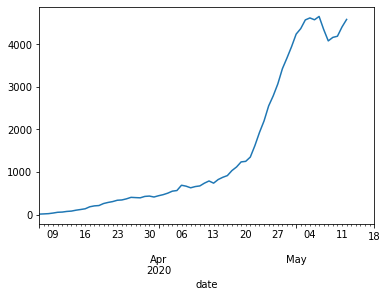

In [207]:
plt = dfRollingWeekState.positiveIncrease.plot.line()

In [208]:
dfJHUData[dfJHUData.state=='Florida'].confirmed.sum()

46442

In [0]:
doWGA = dfCovidtracking[dfCovidtracking.state=='GA'].set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']]\
.groupby(lambda x: x.dayofweek)

In [210]:
doWGA.sum()

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,280.0,859.0,39994.0,4677.0,44671.0
1,375.0,1333.0,49724.0,6503.0,56227.0
2,291.0,1567.0,32075.0,6331.0,38406.0
3,203.0,901.0,44037.0,5058.0,49095.0
4,266.0,1061.0,57529.0,6785.0,64314.0
5,148.0,928.0,51800.0,4436.0,56236.0
6,79.0,267.0,51049.0,4289.0,55338.0


In [211]:
!pip install sodapy

In [0]:
from sodapy import Socrata

In [0]:
client = Socrata("data.sfgov.org", "LCSuN5PrqWkGtBe9dULkS75Rz")

In [0]:
results = client.get("tvq9-ec9w")


In [0]:

results_df = pd.DataFrame.from_records(results)

In [0]:
res = results_df.astype({'case_count':'int16'})

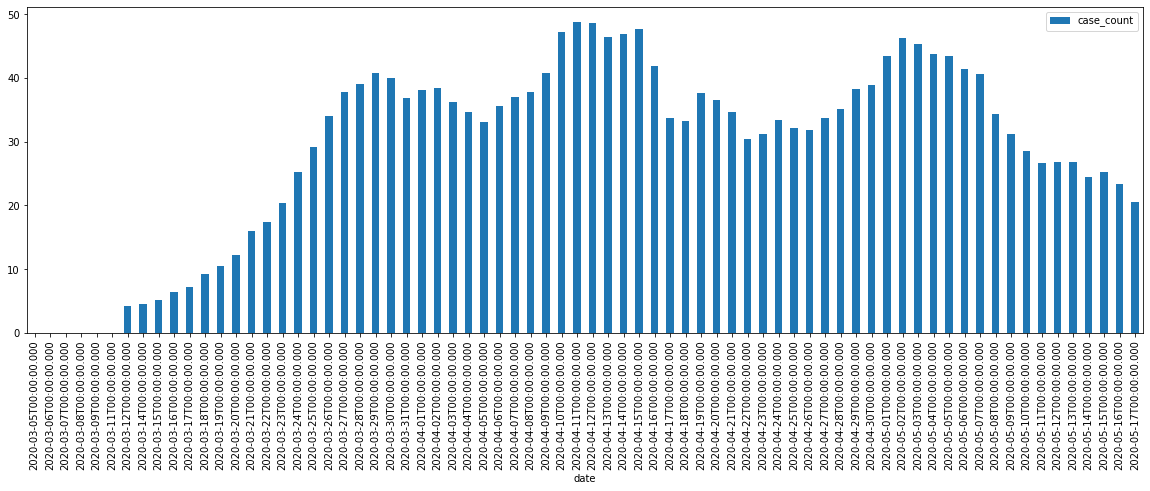

In [217]:
res.groupby('date').sum().rolling(window=7).mean().plot.bar(figsize=(20,6))

# New Section

In [0]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSRmO2pStf7Ft1yYjDULluZXzUAczGK_B34hDemDBadGEY0HTLwlcadF2cHNEwmmvLetUTf-D2ruYCT/pub?gid=0&single=true&output=csv"

df = pd.read_csv(url)

In [220]:
df.head()

,New Total,329,Unnamed: 2,%pos,4.07%,Unnamed: 5,pop,"259,725.00",2.46%
0,date,positive,negative,deaths,pending,tested,hospitalizations,Recovered,NaN
1,20200306,0,0,0,0,NaN,NaN,NaN,0.00%
2,20200307,0,0,0,0,NaN,NaN,NaN,0.00%
3,20200308,1,4,0,8,NaN,NaN,NaN,0.54%
4,20200309,1,4,0,10,NaN,NaN,NaN,0.54%
